# Workbook 00 - Solving beams with `PyNite`

In [85]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model
import forallpeople
forallpeople.environment('structural', top_level = True)

forallpeople.environment

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

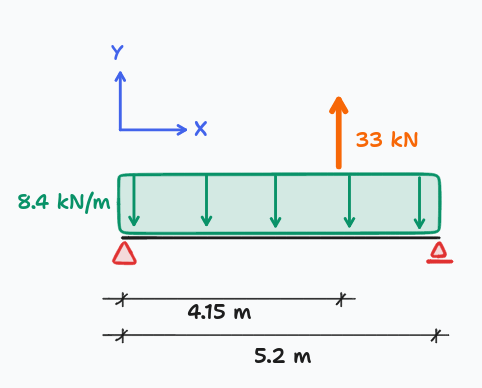

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

{'LC1': 15176.538461538461}
{'LC1': -4496.538461538461}


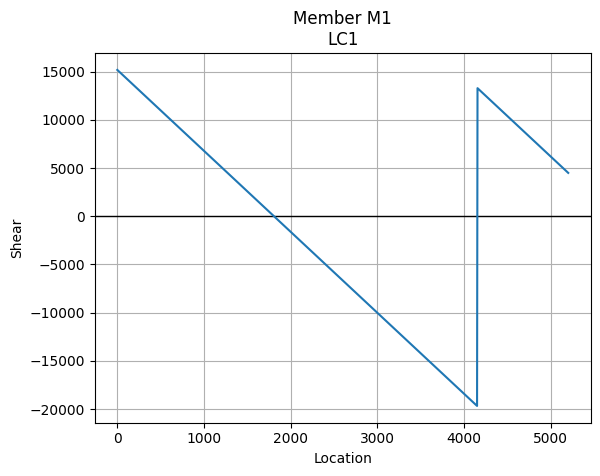

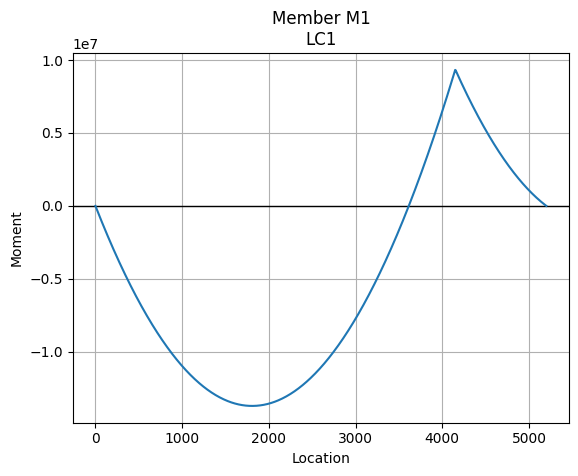

In [87]:
# This is me completing the workbook
beam_model_1 = FEModel3D() # 1st Model
#Geometry
beam_model_1.add_node("no1",0,0,0)
beam_model_1.add_node("no2",5200,0,0)

#Beam Model
beam_model_1.add_member('M1',"no1","no2",E=23e3, G=77e3, Iy=200e6, Iz=400e6, J=30e3, A=1500)
beam_model_1.def_support("no1", support_DX=True, support_DY=True, support_DZ=True,support_RX=True)
beam_model_1.def_support("no2", support_DY=True)

# Combination
beam_model_1.add_load_combo('LC1', {"D": 1.0})

# Loads
beam_model_1.add_member_pt_load("M1",'Fy', 33000, x=4150, case='D')
beam_model_1.add_member_dist_load("M1", 'Fy', -8.4, -8.4, 0, 5200, case='D')

#Output
beam_model_1.analyze()

#Supports reactions
print(beam_model_1.Nodes['no1'].RxnFY)
print(beam_model_1.Nodes['no2'].RxnFY)

#Internal Forces

beam_model_1.Members['M1'].plot_shear("Fy", combo_name='LC1', n_points=1000)
beam_model_1.Members['M1'].plot_moment("Mz", combo_name='LC1', n_points=1000)

#render_model(beam_model_1,combo_name='LC1',annotation_size=300)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

269999.99999999994 539999.9999999999 34545.09846895078 14393.791028729493
{'LC1': 8100.0, 'LC2': 184155.55555555556}
{'LC1': 8100.0, 'LC2': 223044.44444444444}


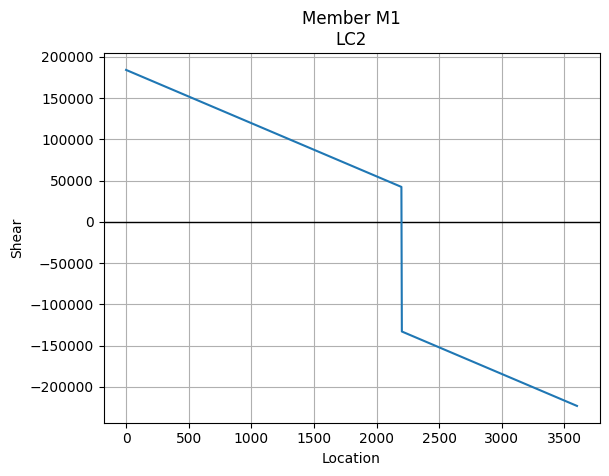

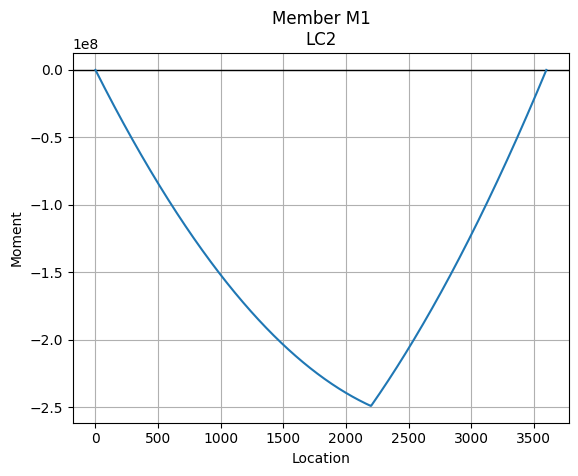

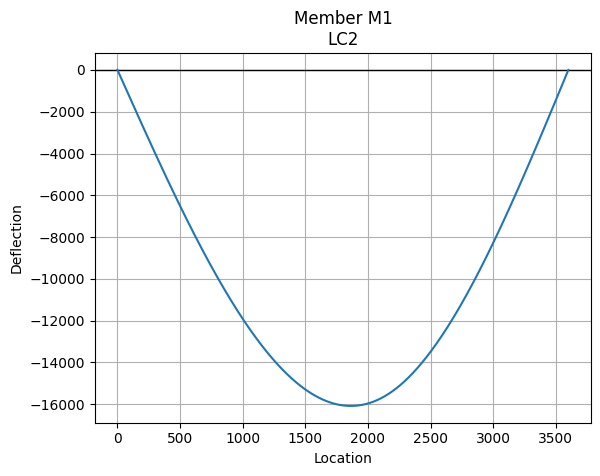

In [88]:
# This is me completing the TASK 02
beam_model_2 = FEModel3D() # 2nd Model
#Geometry
beam_model_2.add_node("no1",0,0,0)
beam_model_2.add_node("no2",3600,0,0)

#Computes Values
Izc= ((0.3*0.6**3)/12)*10**8 #mm4
Iyc= Izc/2
Ec= (22*((45)/10)**0.3)*10**3 #MPa
Gc= Ec/(2*(1+0.2))

print(Iyc,Izc,Ec,Gc)

#Beam Model
beam_model_2.add_member('M1',"no1","no2",E=Ec, G=Gc, Iy=Iyc, Iz=Izc, J=30e3, A=1500)
beam_model_2.def_support("no1", support_DX=True, support_DY=True, support_DZ=True,support_RX=True)
beam_model_2.def_support("no2", support_DY=True)


# Combination
beam_model_2.add_load_combo('LC1', {"D": 1.0})
beam_model_2.add_load_combo('LC2', {"D": 1.0, "L":1.0})

# Loads
beam_model_2.add_member_dist_load("M1", 'Fy', -4.5, -4.5, 0, 3600, case='D')

beam_model_2.add_member_pt_load("M1",'Fy',-175000 , x=2200, case='L')
beam_model_2.add_member_dist_load("M1", 'Fy', -60, -60, 0, 3600, case='L')

#Output
beam_model_2.analyze()

#Supports reactions
print(beam_model_2.Nodes['no1'].RxnFY)
print(beam_model_2.Nodes['no2'].RxnFY)

#Internal Forces

beam_model_2.Members['M1'].plot_shear("Fy", combo_name='LC2', n_points=1000)
beam_model_2.Members['M1'].plot_moment("Mz", combo_name='LC2', n_points=1000)

#deflection

beam_model_2.Members['M1'].plot_deflection('dy', combo_name='LC2', n_points=1000)

#render_model(beam_model_2,combo_name='LC2',annotation_size=300)

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

{'LC1': 22915.500677476943}
{'LC1': 10861.01031578707}
{'LC1': -2296.510993264014}


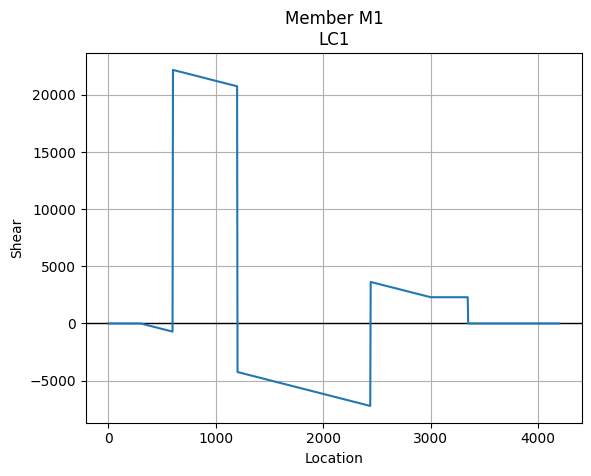

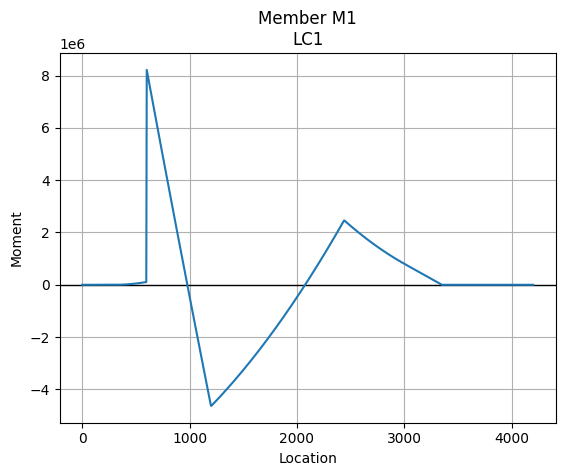

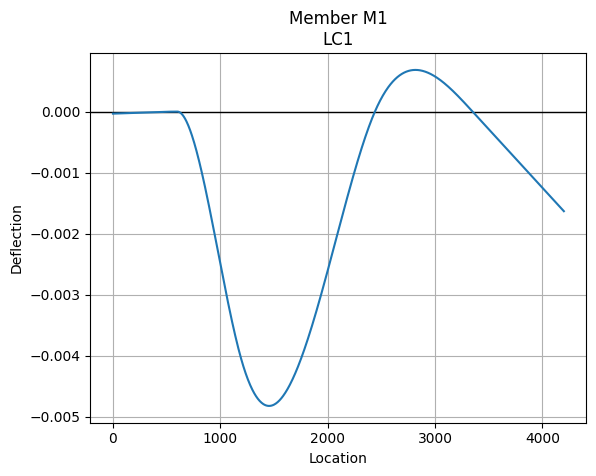

In [132]:
# This is me completing the TASK 03
beam_model_3 = FEModel3D() # 3rd Model
#Geometry
beam_model_3.add_node("no1",0,0,0)
beam_model_3.add_node("no2",600,0,0)
beam_model_3.add_node("no3",2440,0,0)
beam_model_3.add_node("no4",3350,0,0)
beam_model_3.add_node("no5",4200,0,0)


#Beam Model
beam_model_3.add_member('M1',"no1","no5",E=200e3, G=70e3, Iz=854e6, Iy=400e6,J=30e3, A=1500)
beam_model_3.def_support("no2",support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=True, support_RZ=True)
beam_model_3.def_support("no3", support_DY=True)
beam_model_3.def_support("no4", support_DY=True)

# Combination
beam_model_3.add_load_combo('LC1', {"D": 1.0})

# Loads
beam_model_3.add_member_dist_load("M1", "Fy", -2.4, -2.4, 300, 3000, case="D")
beam_model_3.add_member_pt_load("M1",'Fy',-25000 , x=1200, case='D')

#Output
beam_model_3.analyze()

#Supports reactions
print(beam_model_3.Nodes['no2'].RxnFY)
print(beam_model_3.Nodes['no3'].RxnFY)
print(beam_model_3.Nodes['no4'].RxnFY)

#Internal Forces

beam_model_3.Members['M1'].plot_shear("Fy", combo_name='LC1', n_points=1000)
beam_model_3.Members['M1'].plot_moment("Mz", combo_name='LC1', n_points=1000)

#deflection

beam_model_3.Members['M1'].plot_deflection('dy', combo_name='LC1', n_points=1000)

render_model(beam_model_3,combo_name='LC1',annotation_size=300)

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.